## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9995232	total: 59ms	remaining: 59s
1:	learn: 0.9789676	total: 60.1ms	remaining: 30s
2:	learn: 0.9603985	total: 61.3ms	remaining: 20.4s
3:	learn: 0.9437867	total: 62.4ms	remaining: 15.5s
4:	learn: 0.9263046	total: 63.6ms	remaining: 12.7s
5:	learn: 0.9113072	total: 64.6ms	remaining: 10.7s
6:	learn: 0.8955543	total: 65.6ms	remaining: 9.31s
7:	learn: 0.8791567	total: 66.6ms	remaining: 8.26s
8:	learn: 0.8639664	total: 67.4ms	remaining: 7.42s
9:	learn: 0.8478091	total: 68.4ms	remaining: 6.77s
10:	learn: 0.8324480	total: 69.4ms	remaining: 6.24s
11:	learn: 0.8187893	total: 70.3ms	remaining: 5.79s
12:	learn: 0.8034079	total: 71.1ms	remaining: 5.4s
13:	learn: 0.7882897	total: 72ms	remaining: 5.07s
14:	learn: 0.7759476	total: 72.9ms	remaining: 4.78s
15:	learn: 0.7638905	total: 73.7ms	remaining: 4.53s
16:	learn: 0.7523497	total: 74.6ms	remaining: 4.31s
17:	learn: 0.7402320	total: 75.4ms	remaining: 4.11s
18:	learn: 0.7281437	total: 76.2ms	remaining: 3.93s
1

59:	learn: 0.4375003	total: 108ms	remaining: 1.69s
60:	learn: 0.4326690	total: 109ms	remaining: 1.68s
61:	learn: 0.4280162	total: 110ms	remaining: 1.66s
62:	learn: 0.4253369	total: 111ms	remaining: 1.64s
63:	learn: 0.4217381	total: 111ms	remaining: 1.63s
64:	learn: 0.4184676	total: 112ms	remaining: 1.61s
65:	learn: 0.4149409	total: 113ms	remaining: 1.6s
66:	learn: 0.4115689	total: 114ms	remaining: 1.58s
67:	learn: 0.4074612	total: 115ms	remaining: 1.57s
68:	learn: 0.4040552	total: 116ms	remaining: 1.57s
69:	learn: 0.4016071	total: 117ms	remaining: 1.56s
70:	learn: 0.3985638	total: 118ms	remaining: 1.54s
71:	learn: 0.3944500	total: 119ms	remaining: 1.53s
72:	learn: 0.3916880	total: 119ms	remaining: 1.52s
73:	learn: 0.3881436	total: 120ms	remaining: 1.5s
74:	learn: 0.3849165	total: 121ms	remaining: 1.49s
75:	learn: 0.3818009	total: 122ms	remaining: 1.48s
76:	learn: 0.3795885	total: 123ms	remaining: 1.47s
77:	learn: 0.3772392	total: 124ms	remaining: 1.46s
78:	learn: 0.3737904	total: 124ms

159:	learn: 0.2589453	total: 191ms	remaining: 1s
160:	learn: 0.2582042	total: 193ms	remaining: 1s
161:	learn: 0.2572439	total: 193ms	remaining: 1000ms
162:	learn: 0.2562785	total: 194ms	remaining: 997ms
163:	learn: 0.2554991	total: 195ms	remaining: 994ms
164:	learn: 0.2549523	total: 196ms	remaining: 991ms
165:	learn: 0.2542326	total: 197ms	remaining: 988ms
166:	learn: 0.2536383	total: 197ms	remaining: 985ms
167:	learn: 0.2527581	total: 198ms	remaining: 981ms
168:	learn: 0.2521737	total: 199ms	remaining: 978ms
169:	learn: 0.2515918	total: 200ms	remaining: 975ms
170:	learn: 0.2509016	total: 201ms	remaining: 972ms
171:	learn: 0.2502990	total: 201ms	remaining: 970ms
172:	learn: 0.2498218	total: 202ms	remaining: 967ms
173:	learn: 0.2485932	total: 203ms	remaining: 964ms
174:	learn: 0.2478564	total: 204ms	remaining: 962ms
175:	learn: 0.2472112	total: 205ms	remaining: 959ms
176:	learn: 0.2462151	total: 206ms	remaining: 956ms
177:	learn: 0.2456707	total: 206ms	remaining: 953ms
178:	learn: 0.244

286:	learn: 0.1906119	total: 298ms	remaining: 741ms
287:	learn: 0.1901897	total: 299ms	remaining: 740ms
288:	learn: 0.1898178	total: 300ms	remaining: 739ms
289:	learn: 0.1893481	total: 301ms	remaining: 737ms
290:	learn: 0.1887898	total: 302ms	remaining: 735ms
291:	learn: 0.1882464	total: 303ms	remaining: 734ms
292:	learn: 0.1877760	total: 303ms	remaining: 732ms
293:	learn: 0.1871253	total: 304ms	remaining: 731ms
294:	learn: 0.1867218	total: 305ms	remaining: 729ms
295:	learn: 0.1863050	total: 307ms	remaining: 729ms
296:	learn: 0.1859084	total: 307ms	remaining: 728ms
297:	learn: 0.1855776	total: 308ms	remaining: 726ms
298:	learn: 0.1851695	total: 309ms	remaining: 725ms
299:	learn: 0.1848589	total: 310ms	remaining: 724ms
300:	learn: 0.1844636	total: 311ms	remaining: 722ms
301:	learn: 0.1838617	total: 312ms	remaining: 721ms
302:	learn: 0.1837452	total: 313ms	remaining: 719ms
303:	learn: 0.1834172	total: 314ms	remaining: 718ms
304:	learn: 0.1831254	total: 315ms	remaining: 717ms
305:	learn: 

385:	learn: 0.1537614	total: 382ms	remaining: 607ms
386:	learn: 0.1535966	total: 383ms	remaining: 606ms
387:	learn: 0.1531883	total: 384ms	remaining: 605ms
388:	learn: 0.1527762	total: 384ms	remaining: 604ms
389:	learn: 0.1525152	total: 385ms	remaining: 603ms
390:	learn: 0.1522053	total: 386ms	remaining: 601ms
391:	learn: 0.1518366	total: 387ms	remaining: 600ms
392:	learn: 0.1514594	total: 388ms	remaining: 599ms
393:	learn: 0.1512682	total: 388ms	remaining: 597ms
394:	learn: 0.1510296	total: 389ms	remaining: 596ms
395:	learn: 0.1507052	total: 390ms	remaining: 595ms
396:	learn: 0.1503842	total: 391ms	remaining: 594ms
397:	learn: 0.1500344	total: 392ms	remaining: 592ms
398:	learn: 0.1498528	total: 392ms	remaining: 591ms
399:	learn: 0.1494826	total: 393ms	remaining: 590ms
400:	learn: 0.1492175	total: 394ms	remaining: 589ms
401:	learn: 0.1488943	total: 395ms	remaining: 588ms
402:	learn: 0.1485162	total: 396ms	remaining: 586ms
403:	learn: 0.1482296	total: 397ms	remaining: 585ms
404:	learn: 

513:	learn: 0.1216678	total: 489ms	remaining: 462ms
514:	learn: 0.1214118	total: 490ms	remaining: 461ms
515:	learn: 0.1212232	total: 491ms	remaining: 460ms
516:	learn: 0.1209198	total: 491ms	remaining: 459ms
517:	learn: 0.1206414	total: 492ms	remaining: 458ms
518:	learn: 0.1203852	total: 493ms	remaining: 457ms
519:	learn: 0.1201241	total: 494ms	remaining: 456ms
520:	learn: 0.1198803	total: 495ms	remaining: 455ms
521:	learn: 0.1195511	total: 495ms	remaining: 454ms
522:	learn: 0.1193413	total: 496ms	remaining: 453ms
523:	learn: 0.1190784	total: 497ms	remaining: 452ms
524:	learn: 0.1189119	total: 498ms	remaining: 450ms
525:	learn: 0.1186809	total: 499ms	remaining: 449ms
526:	learn: 0.1184424	total: 499ms	remaining: 448ms
527:	learn: 0.1182647	total: 500ms	remaining: 447ms
528:	learn: 0.1181144	total: 501ms	remaining: 446ms
529:	learn: 0.1178441	total: 502ms	remaining: 445ms
530:	learn: 0.1176333	total: 503ms	remaining: 444ms
531:	learn: 0.1174111	total: 503ms	remaining: 443ms
532:	learn: 

615:	learn: 0.1018858	total: 573ms	remaining: 357ms
616:	learn: 0.1016953	total: 574ms	remaining: 356ms
617:	learn: 0.1015671	total: 574ms	remaining: 355ms
618:	learn: 0.1014348	total: 575ms	remaining: 354ms
619:	learn: 0.1012371	total: 576ms	remaining: 353ms
620:	learn: 0.1010622	total: 577ms	remaining: 352ms
621:	learn: 0.1008674	total: 578ms	remaining: 351ms
622:	learn: 0.1006289	total: 578ms	remaining: 350ms
623:	learn: 0.1005569	total: 579ms	remaining: 349ms
624:	learn: 0.1004536	total: 580ms	remaining: 348ms
625:	learn: 0.1004116	total: 581ms	remaining: 347ms
626:	learn: 0.1002306	total: 582ms	remaining: 346ms
627:	learn: 0.1001380	total: 582ms	remaining: 345ms
628:	learn: 0.1000592	total: 583ms	remaining: 344ms
629:	learn: 0.0998875	total: 584ms	remaining: 343ms
630:	learn: 0.0998116	total: 585ms	remaining: 342ms
631:	learn: 0.0996954	total: 586ms	remaining: 341ms
632:	learn: 0.0995930	total: 587ms	remaining: 340ms
633:	learn: 0.0994214	total: 587ms	remaining: 339ms
634:	learn: 

744:	learn: 0.0835945	total: 680ms	remaining: 233ms
745:	learn: 0.0835219	total: 681ms	remaining: 232ms
746:	learn: 0.0833979	total: 682ms	remaining: 231ms
747:	learn: 0.0832589	total: 683ms	remaining: 230ms
748:	learn: 0.0831507	total: 684ms	remaining: 229ms
749:	learn: 0.0830521	total: 685ms	remaining: 228ms
750:	learn: 0.0828684	total: 686ms	remaining: 227ms
751:	learn: 0.0827776	total: 687ms	remaining: 227ms
752:	learn: 0.0826558	total: 688ms	remaining: 226ms
753:	learn: 0.0825024	total: 689ms	remaining: 225ms
754:	learn: 0.0824648	total: 690ms	remaining: 224ms
755:	learn: 0.0823878	total: 691ms	remaining: 223ms
756:	learn: 0.0823467	total: 692ms	remaining: 222ms
757:	learn: 0.0822413	total: 692ms	remaining: 221ms
758:	learn: 0.0821250	total: 693ms	remaining: 220ms
759:	learn: 0.0820267	total: 694ms	remaining: 219ms
760:	learn: 0.0818555	total: 695ms	remaining: 218ms
761:	learn: 0.0817867	total: 696ms	remaining: 217ms
762:	learn: 0.0816963	total: 697ms	remaining: 217ms
763:	learn: 

842:	learn: 0.0737709	total: 763ms	remaining: 142ms
843:	learn: 0.0736539	total: 764ms	remaining: 141ms
844:	learn: 0.0736203	total: 765ms	remaining: 140ms
845:	learn: 0.0734653	total: 766ms	remaining: 139ms
846:	learn: 0.0733741	total: 766ms	remaining: 138ms
847:	learn: 0.0733382	total: 767ms	remaining: 138ms
848:	learn: 0.0732470	total: 768ms	remaining: 137ms
849:	learn: 0.0730885	total: 769ms	remaining: 136ms
850:	learn: 0.0729853	total: 770ms	remaining: 135ms
851:	learn: 0.0728843	total: 771ms	remaining: 134ms
852:	learn: 0.0727972	total: 771ms	remaining: 133ms
853:	learn: 0.0727430	total: 772ms	remaining: 132ms
854:	learn: 0.0726338	total: 773ms	remaining: 131ms
855:	learn: 0.0724971	total: 774ms	remaining: 130ms
856:	learn: 0.0724036	total: 775ms	remaining: 129ms
857:	learn: 0.0723798	total: 776ms	remaining: 128ms
858:	learn: 0.0722754	total: 777ms	remaining: 128ms
859:	learn: 0.0721188	total: 778ms	remaining: 127ms
860:	learn: 0.0720446	total: 779ms	remaining: 126ms
861:	learn: 

969:	learn: 0.0633410	total: 870ms	remaining: 26.9ms
970:	learn: 0.0633301	total: 871ms	remaining: 26ms
971:	learn: 0.0632817	total: 872ms	remaining: 25.1ms
972:	learn: 0.0631851	total: 872ms	remaining: 24.2ms
973:	learn: 0.0630610	total: 873ms	remaining: 23.3ms
974:	learn: 0.0628939	total: 874ms	remaining: 22.4ms
975:	learn: 0.0628283	total: 875ms	remaining: 21.5ms
976:	learn: 0.0627357	total: 876ms	remaining: 20.6ms
977:	learn: 0.0626655	total: 876ms	remaining: 19.7ms
978:	learn: 0.0625801	total: 877ms	remaining: 18.8ms
979:	learn: 0.0625277	total: 878ms	remaining: 17.9ms
980:	learn: 0.0624886	total: 879ms	remaining: 17ms
981:	learn: 0.0623867	total: 880ms	remaining: 16.1ms
982:	learn: 0.0623343	total: 881ms	remaining: 15.2ms
983:	learn: 0.0622689	total: 882ms	remaining: 14.3ms
984:	learn: 0.0621901	total: 883ms	remaining: 13.4ms
985:	learn: 0.0620557	total: 883ms	remaining: 12.5ms
986:	learn: 0.0620323	total: 884ms	remaining: 11.6ms
987:	learn: 0.0619061	total: 885ms	remaining: 10.8

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

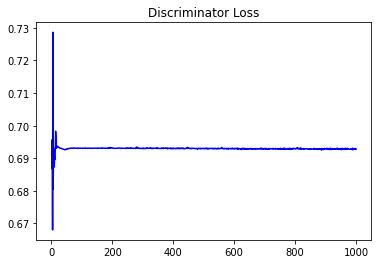

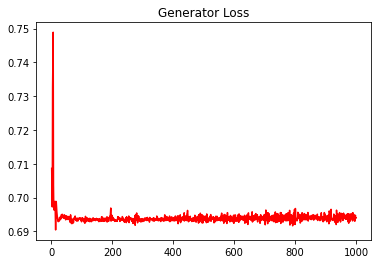

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.0571035496665251


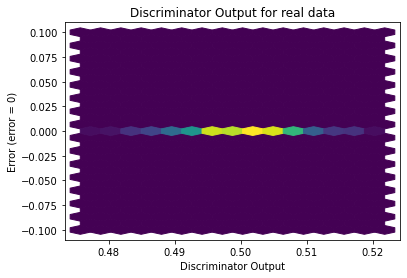

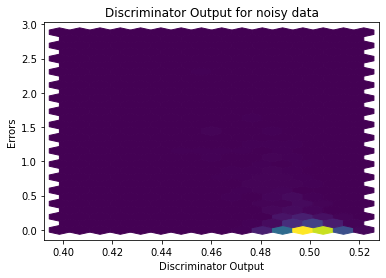

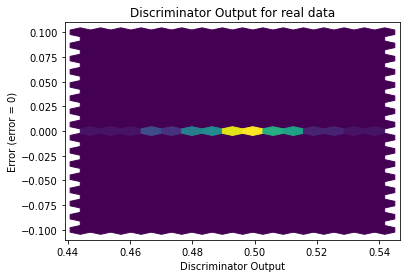

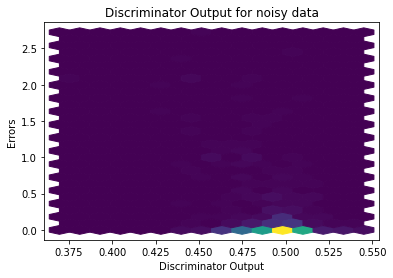

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


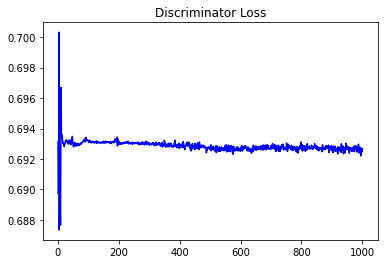

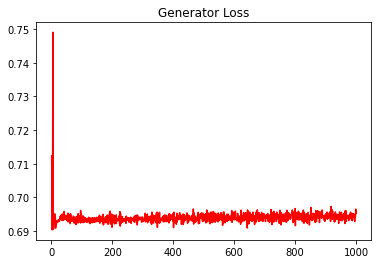

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.05828523569590061


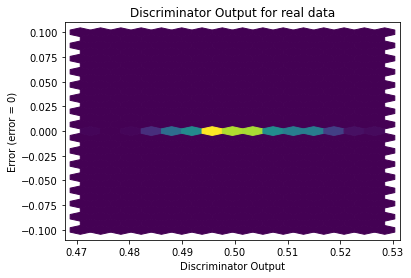

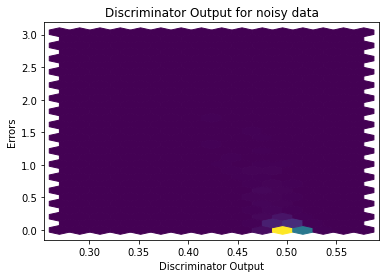

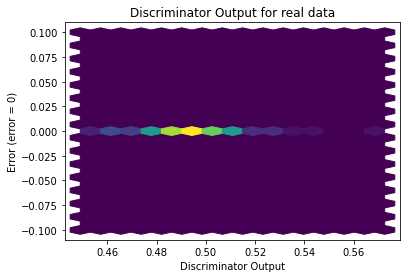

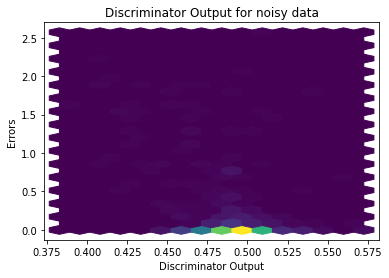

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4659]], requires_grad=True)
